# Sentiment analysis
#### Aim: quantify sentiments of students' review of the course and use that score for data wrangling

### 1. Import libraries and load dataset

Assumes requirements in nltk_env.yaml.
Please refer to README.md for loading these requirements on conda.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
nltk.download('vader_lexicon')

from nltk.probability import FreqDist
from nltk.tokenize import sent_tokenize, word_tokenize, RegexpTokenizer
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/tey15/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to /home/tey15/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

dataset:  Course Reviews University of Waterloo
https://www.kaggle.com/datasets/anthonysusevski/course-reviews-university-of-waterloo

Download csv files from the kaggle website then import csv files into pandas dataframe.

In [2]:
df=pd.read_csv('course_data_clean.csv')

In [3]:
df.head()

,course_code,course_title,num_ratings,useful,easy,liked,num_reviews,reviews,course_rating,course_rating_int
0,CS 115,Introduction to Computer Science 1,2111,21%,10%,23%,86,go to office hours and practice,liked course,1.0
1,CS 115,Introduction to Computer Science 1,2111,21%,10%,23%,86,One of my least favourite courses. Although th...,disliked course,0.0
2,CS 115,Introduction to Computer Science 1,2111,21%,10%,23%,86,It starts with a very low pace but after midte...,disliked course,0.0
3,CS 115,Introduction to Computer Science 1,2111,21%,10%,23%,86,Took this in 2018 with no programming experien...,liked course,1.0
4,CS 115,Introduction to Computer Science 1,2111,21%,10%,23%,86,I loved everything about cs 115. Great instruc...,liked course,1.0


### 2. Preprocessing

General NLTK preprocessing is not needed. However, I remove missing values for the simplicity of the analysis. Missing values are very rare for my dataset.

In [4]:
df.reviews.apply(type).value_counts()

<class 'str'>      14829
<class 'float'>        9
Name: reviews, dtype: int64

In [5]:
df[df.reviews.apply(type) == float]

,course_code,course_title,num_ratings,useful,easy,liked,num_reviews,reviews,course_rating,course_rating_int
2810,SPCOM 223,Public Speaking,498,68%,73%,71%,125,NaN,disliked course,0.0
5982,PSYCH 207,Cognitive Processes,165,75%,75%,75%,39,NaN,disliked course,0.0
6540,COOP 2,Co-operative Work Term,136,93%,84%,95%,7,NaN,liked course,1.0
6578,ARBUS 101,Introduction to Business in North America,135,52%,67%,43%,30,NaN,disliked course,0.0
8311,PD 5,Project Management,80,37%,74%,25%,12,NaN,disliked course,0.0
8373,AHS 107,"Sociology of Activity, Health, and Well-being",78,27%,93%,40%,27,NaN,NaN,NaN
10542,ECE 458,Computer Security,39,91%,57%,77%,6,NaN,disliked course,0.0
11287,WKRPT 400M,Work-term Report,31,0%,20%,6%,3,NaN,disliked course,0.0
11395,BIOL 266,Introduction to Computational Biology,29,90%,68%,83%,10,NaN,liked course,1.0


remove 9 cases that have missing for reviews for simplicity

In [6]:
df = df.dropna(subset=['reviews'])

In [7]:
df.reviews.apply(type).value_counts()

<class 'str'>    14829
Name: reviews, dtype: int64

In [8]:
df.head()

,course_code,course_title,num_ratings,useful,easy,liked,num_reviews,reviews,course_rating,course_rating_int
0,CS 115,Introduction to Computer Science 1,2111,21%,10%,23%,86,go to office hours and practice,liked course,1.0
1,CS 115,Introduction to Computer Science 1,2111,21%,10%,23%,86,One of my least favourite courses. Although th...,disliked course,0.0
2,CS 115,Introduction to Computer Science 1,2111,21%,10%,23%,86,It starts with a very low pace but after midte...,disliked course,0.0
3,CS 115,Introduction to Computer Science 1,2111,21%,10%,23%,86,Took this in 2018 with no programming experien...,liked course,1.0
4,CS 115,Introduction to Computer Science 1,2111,21%,10%,23%,86,I loved everything about cs 115. Great instruc...,liked course,1.0


### 3. Word frequency

To understand the general picture of text, I counted the word frequency.
For counting the word frequency, I made words in lower cases, tokenized by word, removed stopwords, then summarizing the 15 most frequent words in the graph. 

In [9]:
df['reviews_lower'] = df['reviews'].str.casefold()
df.shape[0]

14829

In [10]:
regexp = RegexpTokenizer('\w+')

df['text_token']=df['reviews_lower'].apply(regexp.tokenize)
df.head(3)

,course_code,course_title,num_ratings,useful,easy,liked,num_reviews,reviews,course_rating,course_rating_int,reviews_lower,text_token
0,CS 115,Introduction to Computer Science 1,2111,21%,10%,23%,86,go to office hours and practice,liked course,1.0,go to office hours and practice,"[go, to, office, hours, and, practice]"
1,CS 115,Introduction to Computer Science 1,2111,21%,10%,23%,86,One of my least favourite courses. Although th...,disliked course,0.0,one of my least favourite courses. although th...,"[one, of, my, least, favourite, courses, altho..."
2,CS 115,Introduction to Computer Science 1,2111,21%,10%,23%,86,It starts with a very low pace but after midte...,disliked course,0.0,it starts with a very low pace but after midte...,"[it, starts, with, a, very, low, pace, but, af..."


In [11]:
# Make a list of english stopwords
stopwords = nltk.corpus.stopwords.words("english")

In [12]:
df['text_token'] = df['text_token'].apply(lambda x: [item for item in x if item not in stopwords])
df.head(3)

,course_code,course_title,num_ratings,useful,easy,liked,num_reviews,reviews,course_rating,course_rating_int,reviews_lower,text_token
0,CS 115,Introduction to Computer Science 1,2111,21%,10%,23%,86,go to office hours and practice,liked course,1.0,go to office hours and practice,"[go, office, hours, practice]"
1,CS 115,Introduction to Computer Science 1,2111,21%,10%,23%,86,One of my least favourite courses. Although th...,disliked course,0.0,one of my least favourite courses. although th...,"[one, least, favourite, courses, although, thi..."
2,CS 115,Introduction to Computer Science 1,2111,21%,10%,23%,86,It starts with a very low pace but after midte...,disliked course,0.0,it starts with a very low pace but after midte...,"[starts, low, pace, midterm, gets, really, fas..."


In [13]:
df['text_string'] = df['text_token'].apply(lambda x: ' '.join([item for item in x]))


In [14]:
df[['reviews', 'text_token', 'text_string']].head()

,reviews,text_token,text_string
0,go to office hours and practice,"[go, office, hours, practice]",go office hours practice
1,One of my least favourite courses. Although th...,"[one, least, favourite, courses, although, thi...",one least favourite courses although things ni...
2,It starts with a very low pace but after midte...,"[starts, low, pace, midterm, gets, really, fas...",starts low pace midterm gets really fast canno...
3,Took this in 2018 with no programming experien...,"[took, 2018, programming, experience, ever, st...",took 2018 programming experience ever started ...
4,I loved everything about cs 115. Great instruc...,"[loved, everything, cs, 115, great, instructor...",loved everything cs 115 great instructors fair...


In [15]:
all_words = ' '.join([word for word in df['text_string']])

In [16]:
tokenized_words = nltk.tokenize.word_tokenize(all_words)

In [17]:
fdist = FreqDist(tokenized_words)
fdist

FreqDist({'course': 14401, 'easy': 3870, 'assignments': 3061, 'class': 2895, 'really': 2780, 'interesting': 2668, 'final': 2363, 'content': 2347, 'lot': 2195, 'time': 2007, ...})

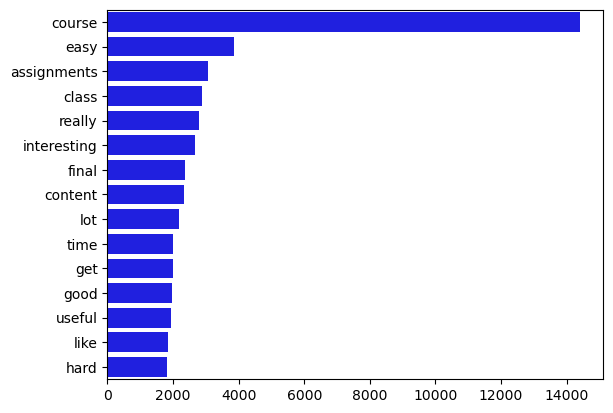

In [18]:
# Obtain top 15 words
top_10 = fdist.most_common(15)

# Create pandas series to make plotting easier
f10dist = pd.Series(dict(top_10))
sns.barplot(y=f10dist.index, x=f10dist.values, color='blue');

It seems that students talk about the level of class, the workload of assignments, and class contents. These are general course reviews.

This is a quick wrangling for word frequency. For a more rigid way, you may do lemmatization. Refer this resource. https://www.kirenz.com/post/2021-12-11-text-mining-and-sentiment-analysis-with-nltk-and-pandas-in-python/text-mining-and-sentiment-analysis-with-nltk-and-pandas-in-python/

### 4. Generating sentiment scores

Some reviews have multiple sentences. The VADER's sentiment score is sensitive to the number of words as described in this article. https://medium.com/@piocalderon/vader-sentiment-analysis-explained-f1c4f9101cd9
Thus, I calculate the sentiment scores for each sentence then compute the average of sentiment scores for each review. Refer the walk-through example of this in the other dataset here. https://realpython.com/python-nltk-sentiment-analysis/#using-nltks-pre-trained-sentiment-analyzer

tokenize by sentences
https://stackoverflow.com/questions/33098040/how-to-use-word-tokenize-in-data-frame

In [19]:
df['tokenized_reviews'] = df.apply(lambda row: nltk.sent_tokenize(row['reviews']), axis=1)

In [ ]:
df['tokenized_reviews'].head()

In [21]:
for row in df["tokenized_reviews"]:
    total=0
    count=0
    for element in row:
        total+=analyzer.polarity_scores(element)["compound"]
        count+=1
    if count >0:
        average=total/count
        print(average)
    else:
        print("Row is empty.")

0.0
0.28253333333333336
0.383725
-0.107325
0.5776
0.19747499999999998
0.37696250000000003
0.2843125
0.02044999999999998
0.6064499999999999
-0.15423333333333333
0.37575000000000003
0.546
0.2827
0.3443833333333333
0.7104
-0.23345
0.24206666666666665
-0.042300000000000004
0.7184666666666667
-0.044199999999999996
-0.4201
-0.01761428571428571
0.0
0.5240666666666667
0.4927
0.4674
0.38683333333333336
0.0258
0.46704999999999997
0.1997
0.5085666666666667
-0.125
0.5106
-0.5719
0.22365000000000002
0.48095000000000004
0.7307
0.2873
0.5994
0.019799999999999998
0.4927
0.5542
-0.0258
0.7269
0.54895
0.11883333333333335
0.4058
-0.6297
0.13648
0.6994
0.0
0.6249
0.2781
0.0
0.07522499999999999
0.6124
0.2202
0.0
-0.296
0.43095
-0.1741
0.3498333333333334
0.4404
-0.6917
0.25433333333333336
0.06092000000000001
0.30025
0.1754
0.398625
0.6093500000000001
0.4404
0.4404
0.22278000000000003
-0.017499999999999988
0.7746
-0.2051
0.8006
0.6808
0.4215
0.3612
-0.1027
0.4601
0.6908
0.0
-0.026524999999999993
0.4588
0.584

0.296
0.2382
0.7777
0.27115
0.21186666666666665
0.59894
0.0
0.4404
0.06275
0.3804
0.0
0.2846
0.5222
-0.092
0.4256
0.7346
-0.29685
0.7841
0.24635
-0.05135
0.22142499999999998
0.6808
-0.5327333333333333
-0.012199999999999989
0.2382
0.7579
0.37924285714285716
0.431
0.6038
0.4144
0.27245
0.4124
0.17440000000000003
0.40206
0.511
-0.15286666666666668
0.3509666666666667
0.49835
0.022924999999999994
-0.1858
-0.053428571428571436
0.12314000000000003
0.40032500000000004
0.16565000000000002
0.006240000000000012
0.13985
0.11132500000000001
0.0421
0.25774285714285716
0.10376666666666666
-0.18306363636363637
0.34
0.2346125
0.03626666666666666
0.26936
0.0
0.2756
-0.10147500000000001
0.45135000000000003
0.32415
0.42873333333333336
0.7003
0.19565
0.40080000000000005
-0.022660000000000013
0.3612
0.48119999999999996
0.05609999999999998
-0.1806
-0.05135
0.08725000000000002
0.31043333333333334
0.4927
0.7368
0.5852
0.45524
0.63205
-0.4218
0.34
0.328
-0.24225
0.4927
-0.09061666666666668
0.23506
-0.0415
0.299

0.36345
0.1409
0.0
0.54405
0.8316
0.4404
0.60545
0.38075000000000003
0.5441
0.7845
0.3182
0.0
0.19955
0.0
0.6348
0.15835333333333335
-0.7725
0.9539
0.33335000000000004
0.30168
-0.1027
0.2591
0.46613333333333334
0.0382
0.5167666666666667
0.6072333333333333
-0.5423
0.252475
0.24185
0.7531
0.02661333333333334
0.4728
0.4927
0.0
0.1468
0.06076
0.3926
0.3779333333333333
0.24635
0.296
0.02729999999999999
0.5302500000000001
0.25264
0.0422
0.8126
0.3205
0.0276
0.25279999999999997
0.7964
0.281125
-0.01988
0.2714
-0.3243
0.3352833333333334
0.0
0.5574
0.0
0.521375
-0.17020000000000002
0.40761666666666657
0.24635
-0.2294
-0.020166666666666666
-0.0797
-0.064
0.36746666666666666
-0.24914999999999998
0.10229999999999999
0.1438
0.5374333333333333
-0.003066666666666662
-0.4023
-0.041928571428571426
0.3841333333333334
-0.2762
0.5735
0.31510000000000005
0.5106
-0.04687499999999997
0.4326
0.5440833333333334
0.30914
0.13085
-0.10296666666666666
-0.12476666666666668
0.39933
0.4829
0.26364999999999994
0.4404


-0.04827142857142857
-0.6161
0.5455
-0.4703
0.5423
0.5687666666666668
0.20095
0.1657
0.12365000000000001
0.1692
0.5719
0.1597
0.231325
0.6486
0.44236666666666663
0.3454
0.23973333333333335
0.29256000000000004
0.0
0.9186
0.13613333333333336
0.8885
-0.009350000000000004
0.05383333333333332
0.2956909090909091
0.3612
0.5874
0.0762
0.2202
0.32430000000000003
0.35150000000000003
0.595
0.6369
0.6705
0.5106
0.34369999999999995
0.4892500000000001
0.7426999999999999
0.30494000000000004
0.0
-0.16235
0.04633333333333334
0.5106
0.20460000000000003
0.905
0.5813333333333334
0.6652
0.09894999999999998
-0.005033333333333334
0.2521
0.6759
0.0
0.2423
0.64615
0.27485000000000004
0.4353
0.05135
0.2163
0.15940000000000001
0.52505
-0.13775
0.9074
0.642675
0.354775
0.38852499999999995
0.48456666666666665
-0.10164999999999999
-0.6694
-0.4588
0.49920000000000003
-0.1832666666666667
0.27313333333333334
0.6306
0.3294
0.3347
0.707
0.4794666666666667
0.3275
0.4972000000000001
0.8393
-0.13234999999999997
0.58845
0.2

0.5566
0.431
0.8402
0.42535
0.5927
0.2144
0.7003
-0.43025
0.4019
0.312075
0.0
-0.1676
0.3239
-0.03
0.29973333333333335
0.2695
0.38354
0.4099
0.26014999999999994
0.02896666666666668
0.9583
-0.3455857142857143
-0.18413333333333334
-0.10071250000000001
0.06549999999999999
-0.048100000000000004
0.27856666666666663
0.2326
0.09755000000000001
0.043600000000000014
0.22319999999999998
0.12221111111111112
-0.5106
-0.6808
0.7435999999999999
0.61505
0.6124
0.24668
0.0
0.1667875
-0.15063333333333334
0.04813333333333334
0.0772
0.06155714285714286
-0.04773333333333332
0.2621
0.39909090909090905
-0.030649999999999955
0.3862666666666667
0.3182
0.3452
-0.06032499999999999
0.0
-0.21066666666666667
0.5499
0.33673333333333333
0.0
0.07369999999999999
-0.05800000000000001
-0.03872500000000001
0.2202
0.9054
-0.19375000000000003
0.0
0.28248333333333336
0.743
0.0
0.0
0.0
0.4588
0.4844
0.101
0.028100000000000014
-0.70825
0.132
0.5767
0.74995
-0.054575
0.5859
0.0
-0.3802
0.4927
0.0
0.36985
-0.2411
-0.08727499999

0.06715
-0.32789999999999997
0.4714333333333333
-0.11315
0.17289999999999997
-0.23883333333333334
-0.3592
-0.10546666666666667
0.08054999999999998
-0.044550000000000034
0.4215
0.13974999999999999
-0.38594000000000006
-0.57725
-0.26515
0.6249
-0.30996666666666667
0.01686666666666666
0.4215
0.802
0.0
-0.48560000000000003
0.6369
0.24318
0.5423
0.28064
-0.15253333333333333
-0.26116666666666666
0.4574
0.2786666666666667
0.6983
0.2447
-0.019549999999999984
0.0
-0.05103333333333334
-0.1027
-0.34
0.0
-0.00645
0.5106
0.48025
0.37895
0.908
0.12492857142857143
0.3457333333333333
0.24080000000000001
0.42847499999999994
0.0
0.50335
0.31845
0.2382
-0.027379999999999995
0.34440000000000004
0.4927
0.8176
0.17167499999999997
0.22693333333333332
0.0
0.335125
-0.5106
0.19559999999999997
0.6478
0.3638666666666667
0.4404
0.7166
0.16898
0.16758
0.5106
0.17273333333333332
0.3710888888888888
0.20092
0.1468
0.0
-0.0386
0.5719333333333333
0.4484
-0.07246666666666668
0.5344333333333333
0.2202
0.36605
0.430466666

0.229475
0.13246666666666668
0.19245
0.5675666666666667
0.14345
0.08524999999999999
0.184025
0.15560000000000002
0.6369
0.11683333333333333
-0.003979999999999995
0.1426181818181818
0.3317333333333333
0.25630000000000003
0.056969999999999986
-0.40976666666666667
0.08225000000000002
0.4404
0.061024999999999996
0.1856
0.008533333333333337
0.19326666666666667
0.15985000000000002
-0.04086666666666667
-0.1753777777777778
0.0
-0.05297500000000001
0.36345
0.6369
-0.08980000000000005
0.036599999999999994
-0.13533333333333333
0.2023
0.19625
0.23486
0.32566
-0.19935
0.0
0.30555
0.1645
0.5643666666666667
0.38455
0.10254285714285714
-0.20315000000000003
0.03277500000000001
0.557925
0.29226
0.237525
-0.42406666666666665
0.105025
0.27446666666666664
0.22954999999999998
0.36692499999999995
-0.17822500000000005
0.39485000000000003
-0.22712499999999997
0.541
0.030950000000000005
0.47550000000000003
-0.3364
-0.4215
0.36819999999999997
0.2732
0.49529999999999996
0.059212499999999994
0.07277142857142858
0.

-0.12186666666666666
0.12205000000000002
0.7876
0.6800333333333333
0.516
0.4404
-0.0516
0.4215
0.3167
0.0
0.5251
0.4118
0.52045
0.5267
0.3804
-0.46153333333333335
-0.17
-0.3865
0.8313
-0.2974666666666667
-0.23800000000000002
-0.2846
-0.4711
0.4215
-0.05135
0.61815
-0.05135
0.4404
0.0
-0.25
-0.09660000000000002
-0.6395
-0.5719
-0.07441666666666664
-0.06455
-0.17
-0.36719999999999997
0.100475
-0.011399999999999993
0.4939
-0.1403
0.128
-0.5593
0.10296666666666669
-0.2942666666666667
0.07824
0.14856666666666665
0.6718
0.5108666666666667
0.45275
0.45195
0.23815
-0.18043333333333333
0.29294
0.10108333333333334
0.55545
0.137475
-0.44613333333333327
0.18142
0.3701
0.0
0.5470333333333334
0.2301571428571429
0.0
0.24945
0.4404
0.7994
-0.07955
0.5223666666666666
0.7598
0.2068
0.6012
0.4063
0.6326499999999999
0.14661428571428572
-0.1591
-0.012199999999999989
0.6249
0.1366
0.0
0.0
0.5997
0.63015
0.1909
0.7783
0.11992857142857141
0.2202
0.2023
0.1027
0.71045
0.10606666666666666
0.30865
0.7684
0.24105

-0.10442307692307692
-0.005840000000000001
0.5223666666666666
0.0
0.24130000000000001
0.17366666666666666
0.2625
0.1735
0.01905
0.14195
0.8211
-0.17
0.0
0.0
0.2247
0.4404
0.44255
0.4404
0.42405
0.4404
0.20635
0.30015000000000003
0.05150000000000002
0.4404
-0.3774
0.08956666666666668
0.21497500000000003
-0.4576
0.0
-0.3638
-0.37213333333333337
0.50005
0.0
0.10487499999999998
0.6098333333333333
0.6588
0.11335714285714285
0.32135
0.21075
0.4927
0.49835
0.36345
0.32764000000000004
0.5120625000000001
-0.3393
0.3361
0.7065250000000001
0.6808
-0.1965
0.5717
0.58675
-0.2263
0.8873
0.1671
0.2732
0.06871999999999999
-0.3612
0.0
-0.23179999999999998
-0.20905
-0.14005000000000004
-0.058328571428571396
0.09830000000000001
-0.41605000000000003
0.0129
-0.3545923076923077
0.6266999999999999
-0.06976
-0.2237333333333333
0.22693333333333332
-0.250575
-0.0772
0.04704999999999998
0.3332
0.166
0.2199
0.1072
-0.4767
0.8416
-0.05103333333333334
0.54288
0.27495
-0.14710000000000004
0.0
0.0
0.2202
-0.183455555

0.6544666666666666
0.06548571428571427
0.56835
0.15807500000000002
0.06553333333333333
0.2083
0.208325
0.40495000000000003
0.4585333333333333
0.6745
0.6908
0.35015
0.11819999999999999
0.1999
0.142
0.7269
0.4404
0.6351333333333333
0.5245666666666666
0.16463333333333333
0.37929999999999997
-0.11315
0.09966666666666668
-0.4201
0.6561
0.3061
0.4019
0.16804999999999998
-0.3243
-0.36863333333333337
0.05656666666666669
-0.23020000000000002
0.1591
0.31805
0.1583
0.20995
0.4843
0.49060000000000004
0.0
0.2622
0.5994
0.41192
0.3776
0.63935
0.2377
0.49523333333333336
0.26932500000000004
0.8221499999999999
0.4019
0.0
0.509525
0.4717
0.8293
0.21999999999999997
0.42405000000000004
0.7725
0.0012333333333333085
0.2382
0.6195333333333334
0.013766666666666668
0.331925
0.12760000000000002
0.6980500000000001
0.12973333333333334
-0.010933333333333314
0.56898
0.27842500000000003
-0.015833333333333338
0.5760666666666666
-0.14963999999999997
0.4738
0.49135
0.4404
-0.218225
0.17265
0.30810000000000004
0.31615
0

0.2853625
0.2553
0.24635
-0.041149999999999964
0.0
0.3041666666666667
0.6369
0.33305
0.24439999999999998
0.291
0.19785000000000003
0.46821666666666667
0.0
-0.0009
0.6193666666666667
0.6182000000000001
0.5569
0.490575
0.08391999999999998
0.6236
0.30575
-0.14839999999999998
0.22435
0.24656666666666668
0.0008333333333333156
0.11966666666666664
0.41169999999999995
0.0
0.33525
0.4930666666666667
0.216475
0.5409999999999999
0.10295
0.21670000000000003
0.6186
0.30639999999999995
0.1147
0.0
0.36519999999999997
0.20095
0.2739
0.395
0.24409999999999998
0.6305000000000001
0.5265333333333334
0.20025
0.7269
0.08326666666666667
0.4644
0.5910666666666667
0.3818
0.5106
0.3919
0.85545
0.46145
0.3764
-0.16765
0.262825
0.3818
0.059885714285714285
0.52255
-0.38525
0.7803
0.5256
0.386375
0.4404
-0.06965
0.40886666666666666
0.12392
0.40196666666666675
-0.012333333333333344
-0.4931
0.226775
-0.10115
0.03026666666666668
0.14293333333333333
0.0
0.0
0.03500000000000003
0.05790000000000001
-0.6428
-0.4754
0.0003

0.6270666666666667
0.01015000000000002
-0.4697
0.0
-0.743
-0.1656
-0.05996666666666667
0.2732
0.37135
0.26018571428571424
0.29875555555555555
0.0
0.20095
0.10136666666666667
0.4019
0.4577
0.0
0.3051
-0.0395
0.875
0.46399999999999997
0.18338333333333334
-0.11709999999999998
0.25625
0.29262
0.1268
0.5741999999999999
0.6693333333333333
0.48905
-0.6663
0.36999999999999994
0.008950000000000014
0.21694999999999998
0.153575
0.44225000000000003
0.0807
0.4927
0.33290000000000003
0.2202
0.2982
0.04855000000000001
0.03785
-0.025899999999999996
0.29016000000000003
-0.031233333333333325
0.1468
0.18075
-0.5727
0.2716
-0.5574
0.26597499999999996
0.16716
-0.2616714285714286
0.11855000000000002
-0.4939
0.0
0.0
-0.41079999999999994
-0.3197
0.050199999999999995
0.21624999999999997
0.31804000000000004
0.42926000000000003
0.215625
0.0
0.262475
0.5106
0.27155
0.043175000000000005
0.6124
0.0
0.17900000000000002
0.265
0.11499999999999999
0.16885
0.1731625
0.31245
0.17213333333333336
0.67025
0.61895
0.4404
0.3

-0.10094999999999998
0.5525
-0.0380142857142857
0.355
0.47122
0.0998
0.10095
0.02686249999999999
0.2243
-0.8074
0.47619999999999996
0.34975
-0.132
0.2891333333333333
0.6119
0.0
0.4848
0.1276625
0.50935
0.2464666666666667
0.0
0.39220000000000005
0.13775
0.8597
-0.20095
0.7063333333333334
0.1909
0.064975
0.3953
0.1864
0.08468333333333333
-0.34198333333333336
0.5994
0.52942
0.18527500000000002
0.5574
0.3196
0.0
0.0772
0.40080000000000005
0.32175
-0.032174999999999995
0.5106
0.0
0.611
0.3101666666666667
0.47885
0.2664
0.37760000000000005
0.34862000000000004
0.1998
0.38349999999999995
0.9239
0.5994
0.2152333333333333
0.4404
0.6249
-0.016066666666666656
-0.04523333333333331
0.4927
0.39233333333333337
0.7003
0.5994
0.9291
-0.1027
0.17874999999999996
-0.7717
-0.29163333333333336
0.3182
0.0
-0.03423333333333333
-0.09044285714285714
0.4215
0.7474
0.9184
0.7612
0.43553333333333333
0.3612
0.5170333333333333
0.31825
0.24219999999999997
-0.1706
0.55755
0.3817
0.34053333333333335
0.5484333333333334
0

0.21246666666666672
-0.17663333333333334
0.309425
0.36985
0.6249
0.81725
-0.04887500000000001
0.4404
-0.23373333333333335
0.0
0.0
0.17428000000000005
0.0
0.4404
0.19329999999999997
0.3383285714285714
0.15445
0.1589
0.4926
0.2294
0.19243333333333335
0.32630000000000003
0.15395
0.0
0.0
0.3658
0.5530999999999999
0.449
-0.0947
0.10494999999999999
-0.5253
0.2676
0.54035
0.16703333333333334
-0.27115
0.4939
0.03649999999999999
0.13396666666666665
0.0
0.21075
-0.4939
0.23023333333333332
0.0
0.34356666666666663
0.5194
0.14555
0.07543333333333334
0.43693333333333334
0.71245
-0.028342857142857142
0.3111333333333333
-0.11498333333333333
0.2382
0.4019
0.1806
-0.06873749999999999
0.0
-0.14088333333333333
0.0
-0.0772
0.053299999999999986
0.09
0.0
0.1531
-0.1655
0.5296
0.08763333333333333
-0.1665
0.5520333333333333
-0.01155
0.6124499999999999
0.24635
0.6312
-0.00645
0.32316666666666666
0.3570666666666667
0.18676666666666666
0.0
0.09759999999999999
0.1603
0.32716666666666666
0.4901666666666667
0.22938


0.1948125
0.2913
0.4522
0.5465285714285715
0.3182
0.3641857142857143
0.8625
-0.028279411764705876
0.31543333333333334
-0.09582222222222223
0.2396
0.30265
0.5873
0.20003333333333337
0.33466666666666667
0.0
0.6084999999999999
0.3818
0.07866
0.0
0.2732
0.4143333333333333
0.54
0.2382
-0.11112
0.14894999999999997
-0.5216
-0.2059875
-0.46045
0.4019
-0.029
-0.046599999999999975
-0.2795
0.3566
0.8641
0.1722
0.6446999999999999
0.10215
0.18158333333333335
0.049460000000000004
0.7351
0.701
0.37156666666666666
0.3334
0.8147
0.4927
-0.08598
0.04126666666666667
-0.024400000000000005
-0.012233333333333327
0.4254
-0.2759142857142857
0.2874666666666667
0.48505
-0.3182
0.30993750000000003
0.54135
0.5989
0.46456666666666663
0.0
0.1567833333333333
-0.027899999999999998
0.2732
-0.094
0.4404
0.5859
-0.43342
0.0
0.6124
-0.06715
0.7269
0.16455
0.51295
0.24745
0.07894999999999999
0.1529125
0.2914333333333333
0.44854000000000005
0.4402833333333333
0.43632
0.60725
0.011075000000000008
0.5048750000000001
0.01815


0.4767
0.15925
0.2422666666666667
0.4737
0.3769600000000001
-0.11676666666666667
-0.1144
-0.116175
0.10373333333333332
0.38225
0.45625000000000004
-0.013850000000000001
0.3953
0.434
-0.3182
0.42684999999999995
0.6661333333333334
0.6361
0.4295
-0.2475
0.2758
0.0
0.7364999999999999
-0.023811111111111116
-0.4063
0.01675
0.15046666666666667
0.1466
0.13696666666666665
0.42745
0.5958
0.7954
0.0
0.0
0.33525
0.4927
-0.015050000000000008
0.21453333333333335
0.08275
-0.01516666666666668
0.040450000000000014
0.0193
0.13785
0.17539999999999997
-0.2374666666666667
0.11353333333333333
0.35150000000000003
0.191975
0.0
0.6363
0.5541
0.06344000000000001
0.1998
-0.5423
0.45726666666666665
0.2839
0.532375
0.4019
-0.1351
0.0
0.48322857142857145
-0.23835
-0.43394999999999995
-0.1419
0.807
0.0772
0.0
-0.3428
-0.3412
0.24534444444444448
-0.32560000000000006
0.65985
0.4504333333333334
0.43905
-0.268
-0.296
0.8241
0.0
0.28725
0.21075
0.0
0.4708
0.40253333333333335
0.15731666666666666
0.226725
0.417142857142857

0.420825
0.123175
0.24313333333333334
0.22833333333333336
0.2564666666666667
-0.03345
0.30344
0.305275
0.45441666666666664
-0.2006
0.012733333333333333
0.4576
0.5905
0.5701
0.6739999999999999
0.41701999999999995
0.0
0.856
0.01770000000000002
0.5499
0.19440000000000002
0.0
0.5126666666666667
0.26762500000000006
0.31793333333333335
0.29338333333333333
0.2858
0.3971
0.5452333333333333
0.0
0.6841
0.2803
0.2942
0.7008
-0.2194
-0.14760714285714285
0.2245666666666667
0.26026
0.1468
0.3658
0.0
0.0
-0.6457
-0.2944
0.0
0.0
0.19410000000000002
0.0
0.3412
0.5796
0.15248
0.2724
0.14421250000000002
0.0
-0.21433333333333335
0.6971
0.05545000000000003
0.58145
0.5106
0.2805
0.15464999999999998
0.39195
0.30932
0.04277500000000001
-0.11315
0.3067666666666667
0.49723333333333336
0.21606999999999998
0.5761999999999999
0.02788571428571429
0.26511999999999997
0.20082499999999998
0.19396666666666665
-0.037739999999999996
0.0
0.0
0.6952
-0.20165
0.4919
0.260575
0.17074999999999999
0.6597
-0.012449999999999989


In [22]:
result=[]
for row in df["tokenized_reviews"]:
    total=0
    count=0
    for element in row:
        total+=analyzer.polarity_scores(element)["compound"]
        count+=1
    if count >0:
        average=total/count
        print(average)
        result.append(average)
df["agg_polarity"]=result

0.0
0.28253333333333336
0.383725
-0.107325
0.5776
0.19747499999999998
0.37696250000000003
0.2843125
0.02044999999999998
0.6064499999999999
-0.15423333333333333
0.37575000000000003
0.546
0.2827
0.3443833333333333
0.7104
-0.23345
0.24206666666666665
-0.042300000000000004
0.7184666666666667
-0.044199999999999996
-0.4201
-0.01761428571428571
0.0
0.5240666666666667
0.4927
0.4674
0.38683333333333336
0.0258
0.46704999999999997
0.1997
0.5085666666666667
-0.125
0.5106
-0.5719
0.22365000000000002
0.48095000000000004
0.7307
0.2873
0.5994
0.019799999999999998
0.4927
0.5542
-0.0258
0.7269
0.54895
0.11883333333333335
0.4058
-0.6297
0.13648
0.6994
0.0
0.6249
0.2781
0.0
0.07522499999999999
0.6124
0.2202
0.0
-0.296
0.43095
-0.1741
0.3498333333333334
0.4404
-0.6917
0.25433333333333336
0.06092000000000001
0.30025
0.1754
0.398625
0.6093500000000001
0.4404
0.4404
0.22278000000000003
-0.017499999999999988
0.7746
-0.2051
0.8006
0.6808
0.4215
0.3612
-0.1027
0.4601
0.6908
0.0
-0.026524999999999993
0.4588
0.584

0.69275
0.6249
0.632075
0.19238
0.43065000000000003
0.2884
0.3818333333333333
0.4304
-0.20525
0.4404
0.3454
0.3229714285714285
0.22297499999999998
-0.2393
0.47315
0.39955
0.82255
0.77685
0.4574
0.5496000000000001
0.6997
0.58235
0.28402
0.22606666666666664
0.41043333333333337
0.19125
-0.25597142857142857
0.204075
0.5539000000000001
0.03259999999999999
0.19405
0.327
0.5461
0.0762
0.33562
0.2076916666666667
0.6698333333333334
0.15911666666666668
0.17125454545454546
0.3252333333333333
0.7269
0.518725
0.043833333333333335
0.7269
0.1466
0.10572
-0.146025
-0.10965000000000001
0.03305
0.23817499999999997
0.0129
0.3159
0.1738333333333333
0.4404
0.4588
0.55035
0.6637000000000001
0.20095
0.575
0.16743333333333332
0.49252499999999994
0.35121428571428576
0.6109
0.14049999999999999
-0.017424999999999996
0.4404
0.38075000000000003
0.35966666666666675
0.0
-0.179675
0.6626333333333333
0.6194000000000001
0.12587500000000001
0.2569666666666666
0.7264
0.0
0.24383333333333335
0.4404
0.15253333333333333
0.6

0.70308
-0.8121
-0.3182
0.0
-0.013563636363636373
0.4927
0.3891
0.2732
-0.3348
0.3841
-0.1806
0.60205
0.42253333333333337
-0.038800000000000015
0.3562
-0.2755
0.128
0.082825
0.4404
-0.4215
0.49540000000000006
0.3034
-0.7359
0.43342
0.5602333333333332
0.20709999999999998
0.31845
0.39380000000000004
0.0
0.042766666666666675
-0.08499999999999999
0.20933333333333334
0.26453333333333334
0.0
0.7269
0.0
0.38915
0.4939
-0.1902
0.7964
0.0
0.4404
0.4588
0.0
0.13656666666666667
-0.0615
0.46409999999999996
-0.35236
0.4404
0.0044500000000000095
0.21909999999999996
0.7783
-0.15445
0.0
-0.6369
0.7902
-0.1919
0.1591
0.3021
0.38053333333333333
-0.39543333333333336
0.04004999999999999
0.7003
0.017250000000000015
0.17
0.0
0.7269
-0.3804
-0.09183333333333334
0.0
0.0
0.6369
0.4404
0.07220000000000001
-0.7257
0.21075
0.2382
0.4404
0.2202
0.0
0.596
0.0
-0.4019
0.4404
0.0
-0.34
0.2202
0.0
0.534
0.35315
0.0762
0.2323
0.4349
0.4678
0.14959999999999998
0.31245
0.40426
0.50335
-0.27115
0.0
0.0
0.2263
0.56645
0.86

-0.3037571428571429
-0.3163
0.742
0.33199999999999996
0.054459999999999995
0.02152499999999999
0.10372222222222222
0.7003
0.27956250000000005
-0.26863333333333334
0.29484
0.3182
0.293425
0.23643999999999998
0.3146
0.15021111111111107
0.34034
0.28312499999999996
0.31815
0.23536
0.5051666666666667
-0.5574
-0.0322
0.2584
0.0
0.17046666666666666
-0.2876666666666667
0.36544
0.481175
0.0
0.4939
0.36345
-0.21880000000000002
0.0917428571428572
0.30495
0.14472500000000002
0.01048571428571428
0.18
-0.11746666666666666
-0.296
0.1366
0.40693333333333337
0.7359
0.21965
-0.6249
-0.006199999999999997
0.48334
0.6975
-0.16874
0.06051666666666666
0.2743428571428571
0.58115
0.16304000000000002
-0.12222500000000001
-0.61635
0.11289999999999997
0.51335
0.0
-0.01156666666666665
0.74375
0.1531
-0.6436
0.46715
0.24695
-0.031799999999999995
0.3311
-0.1027
0.2852818181818182
0.1249
-0.03905
0.0121
0.5574
-0.36715
0.5984
0.2546333333333333
0.32926666666666665
0.49934999999999996
-0.4201
0.32005
0.126899999999999

-0.1250666666666667
-0.17506249999999998
-0.12004999999999999
-0.20308888888888887
-0.08571428571428574
0.0
0.0
-0.5938
0.0
0.214
0.08730666666666667
-0.3486375
-0.11627499999999999
-0.16343333333333332
0.3014
0.0
0.0291625
0.0
0.06570000000000001
-0.28600000000000003
0.41698
-0.19216000000000003
0.08293333333333332
-0.21239999999999998
0.3054
0.4215
0.0
0.08960000000000001
0.0
0.06743333333333333
0.405
0.0
0.1468
-0.1761
0.1136
0.10115
0.13257999999999998
-0.01803333333333333
0.2202
-0.19165000000000001
0.6759999999999999
0.45514999999999994
0.14322
0.743
0.1735
0.1456
0.07183333333333332
0.1332
0.5266
0.3612
0.0
0.4404
0.6369
-0.07655
0.0
0.008560000000000012
-0.09995999999999998
-0.27513333333333334
0.0258
-0.296
0.4857666666666666
-0.08333333333333333
-0.21175
-0.11159999999999998
0.4019
0.08080000000000001
0.4088
0.08584
0.0
-0.08003333333333335
0.45553333333333335
-0.3751
0.13981666666666667
0.4404
0.3612
0.038700000000000005
0.1468
0.5879
0.6696
0.4927
-0.07429999999999999
0.093

0.26461428571428575
0.03858
0.501
0.36966666666666664
0.20622857142857143
0.2202
0.4372
-0.02970000000000002
0.5339
-0.015566666666666654
0.0
0.03650000000000001
-0.15502000000000002
0.3274
-0.3459
0.30510000000000004
0.26722500000000005
0.4404
0.39204
0.3607
0.03153333333333334
0.0
-0.5009
0.10115
0.4684
0.24635
0.36819999999999997
0.18660000000000002
0.5299
-0.06164000000000001
0.22503333333333334
0.8934
0.84725
0.38213333333333327
0.11438333333333332
0.016166666666666663
0.0059000000000000025
0.0
0.25
0.24225
0.533
-0.5423
0.0
-0.02503333333333337
0.49269999999999997
0.4404
0.9062
0.7783
0.7096
0.38555
0.13244999999999998
0.899
0.4404
0.4404
0.12022000000000002
0.42995
0.1629
0.020725
0.46672
0.37354999999999994
0.3510166666666667
0.7574
0.0762
0.3352769230769231
0.226775
0.3393
0.5003333333333333
0.4215
0.060475000000000015
0.148
0.20106666666666664
0.45372500000000004
-0.20095
-0.4019
0.5035499999999999
0.323
0.27495
0.521
0.0794
-0.06130000000000001
0.24535999999999997
0.6012
0.2

0.20546000000000003
-0.3818
0.4404
0.6123
0.21109999999999998
-0.28688
-0.4215
-0.6105
0.09743333333333333
0.0
0.41455000000000003
0.07335
0.2463
0.38820000000000005
0.4926
0.6369
0.0
0.0
0.6109333333333333
0.0
0.08417142857142856
0.029483333333333323
-0.03452500000000001
0.6486
0.8126
-0.08505
0.22656
-0.314025
0.2775
0.4404
0.15395000000000003
-0.07514285714285715
-0.040283333333333345
0.15839999999999999
0.4588
0.2253
-0.26275
-0.0061249999999999916
0.7701
0.2248
0.128
0.7962
-0.6808
-0.4201
-0.2732
-0.016999999999999998
0.14675
0.29253999999999997
0.695425
0.04520000000000002
0.232375
0.448075
0.4316454545454546
0.24635
0.1779
0.25315
-0.007079999999999998
0.2377
0.6249
0.5966
-0.19355
0.05387142857142856
-0.3335333333333333
0.4404
0.6249
0.08094444444444443
0.25899999999999995
-0.5406
-0.0071272727272727295
-0.1543277777777778
-0.03385
0.060657142857142854
-0.028899999999999974
0.36985
0.229475
0.13246666666666668
0.19245
0.5675666666666667
0.14345
0.08524999999999999
0.184025
0.1

0.16102
0.0
0.3237
0.4576
-0.297
0.7499
0.05516666666666667
0.37706666666666666
0.872
0.33799999999999997
0.46609999999999996
0.0
-0.04365
0.148
0.6746
0.27876666666666666
0.230825
0.1075666666666667
0.7425999999999999
-0.0772
0.14049999999999999
0.06743333333333333
-0.6124
0.008775000000000005
-0.1027
0.6858
-0.08025000000000002
0.0812
0.09689999999999999
0.0
0.2202
0.10810000000000002
0.4019
0.11116666666666665
0.3077666666666667
0.22379999999999997
0.3497
0.4927
0.2185
0.1113857142857143
-0.07237
0.4404
-0.04846666666666664
-0.5893
-0.4333
-0.2686
0.4393
0.5994
0.2915666666666667
0.77075
0.3192
0.2767
0.06816666666666664
0.19756666666666667
0.4679
-0.4055
-0.1858
0.4404
0.2666
-0.12186666666666666
0.12205000000000002
0.7876
0.6800333333333333
0.516
0.4404
-0.0516
0.4215
0.3167
0.0
0.5251
0.4118
0.52045
0.5267
0.3804
-0.46153333333333335
-0.17
-0.3865
0.8313
-0.2974666666666667
-0.23800000000000002
-0.2846
-0.4711
0.4215
-0.05135
0.61815
-0.05135
0.4404
0.0
-0.25
-0.09660000000000002

-0.058328571428571396
0.09830000000000001
-0.41605000000000003
0.0129
-0.3545923076923077
0.6266999999999999
-0.06976
-0.2237333333333333
0.22693333333333332
-0.250575
-0.0772
0.04704999999999998
0.3332
0.166
0.2199
0.1072
-0.4767
0.8416
-0.05103333333333334
0.54288
0.27495
-0.14710000000000004
0.0
0.0
0.2202
-0.18345555555555557
0.32395999999999997
0.30984999999999996
0.313925
-0.10488750000000002
0.19658333333333333
0.585475
0.14625
0.017000000000000015
0.5096
0.09405000000000001
0.6497666666666667
-0.40954999999999997
0.248
0.42783333333333334
0.41143
-0.18745
0.305275
0.3374333333333333
0.4788333333333334
-0.131
0.31364
0.5499
0.11902857142857141
0.0877
-0.03252222222222224
0.165525
0.4404
0.8519
0.061100000000000015
-0.128
0.4927
0.55855
0.0
0.10485
0.10115
0.2265
0.42965
0.1808
0.6953333333333332
0.46525
-0.6705
0.1745
0.44895
-0.15988
0.85
0.33885
0.1626
0.4501
0.2924333333333333
0.7574
0.3314
0.6249
0.48113333333333336
0.6249
0.86175
0.6337250000000001
0.21383999999999997
0.158

0.5561
-0.06473333333333331
0.0
0.26655
0.5994
0.2553
0.4605
-0.14491666666666667
0.28595
0.0
0.24264285714285716
0.5263333333333333
0.15508333333333335
0.0
0.5461750000000001
0.6093500000000001
0.3804
0.0
-0.148
0.4235
-0.10963333333333335
0.43885
0.7387
0.2988
0.5130333333333333
0.8519
0.1366
0.8024
-0.20206
0.06371111111111112
0.5109666666666667
0.43894999999999995
-0.4754
-0.4215
0.0
0.5859
0.0
0.6381
0.01705000000000001
0.5264333333333333
0.24256666666666668
-0.002066666666666661
0.3412
0.5941
0.24707142857142855
0.0
0.29340000000000005
0.3612
0.1623
0.4404
0.51485
-0.09261
-0.12558333333333335
0.899
0.5046
-0.12207499999999999
0.03737999999999999
-0.11358333333333333
0.4927
0.5106
-0.2966
0.18455
0.6174
0.3612
0.7845
-0.12876666666666667
0.15333333333333332
0.5574
-0.3991
0.0
0.1362
0.3952
0.18745
0.09620000000000004
0.2846
0.0
0.4404
-0.4215
0.6492
-0.0772
0.15705000000000002
0.18083333333333332
0.5889333333333333
-0.00013333333333333716
0.5422
0.8519
0.18026250000000002
-0.1789

0.5306833333333333
0.2288
0.17286666666666664
-0.1806
-0.6462
0.31320000000000003
0.0
0.06780000000000003
-0.14886666666666667
-0.032299999999999995
0.2793857142857143
0.041833333333333333
0.16415000000000002
-0.23835
0.08935
0.5563666666666667
-0.08859999999999998
0.0
-0.0667
0.0
0.03319999999999997
0.4773
0.1811888888888889
0.3155333333333334
0.2732
0.8316
-0.010342857142857136
0.0
0.42625
0.05797142857142856
0.1016
0.0
0.0
0.1366
0.5267
-0.06575
0.0
0.22585
0.0
0.53235
0.233375
0.17769999999999997
-0.054866666666666654
0.1531
0.22796666666666665
0.3731333333333333
0.24635
0.15295
0.0762
0.7645
0.0
0.6358666666666667
0.04685
0.2628
0.0
-0.0635
0.0
-0.05522857142857142
-0.25475
-0.049750000000000016
0.044675000000000006
-0.15833333333333333
0.15540833333333334
-0.027049999999999963
0.29656666666666665
0.49355
0.13863636363636364
0.8271
0.49365000000000003
0.6249
0.6121
0.1692
0.40870000000000006
0.20656666666666665
-0.05360000000000001
0.2377
0.38596666666666674
0.7442500000000001
0.1

-0.253425
-0.4292
0.6222666666666666
0.5023799999999999
-0.4201
-0.11466666666666665
0.4404
0.1573
-0.2023
0.2553
0.2263
0.0772
0.04710000000000001
0.2553
0.13396666666666665
0.30066666666666664
0.65465
0.4754
0.42835
0.2946
-0.1589
0.31143333333333334
0.8012
-0.396
0.8481
0.4497
0.2608333333333333
0.4598
0.6474000000000001
0.26913333333333334
0.43590000000000007
0.401
0.5927
-0.1779
0.5379
0.21075
0.3270230769230769
0.3915
0.0
-0.5904
0.47550000000000003
0.5989
0.262
0.10815
0.49783333333333335
0.6048
0.22693333333333332
-0.4215
0.3404
0.0
0.7641249999999999
0.0
-0.7096
0.7819666666666666
0.22812500000000002
0.5267
0.7036000000000001
0.34
0.7096
0.71645
0.43986666666666663
-0.3182
0.0
0.2553
0.26443333333333335
0.0
0.09090000000000001
0.3384
0.15396666666666667
0.160675
0.699
0.255975
0.5244500000000001
0.16463333333333333
-0.20792499999999997
-0.4413
0.11909999999999998
0.8049
-0.228875
-0.085
0.12430000000000001
-0.2755
0.24525000000000002
0.4900333333333333
0.2845
0.385900000000000

0.20068000000000003
0.3994
0.3407
0.41740000000000005
0.30457500000000004
0.2079333333333334
0.09482
0.35705
0.348075
0.04752499999999999
0.5581666666666667
0.4564000000000001
0.13256923076923077
0.14152
-0.02983333333333334
0.5470666666666667
0.4872000000000001
0.14049999999999999
0.1909
-0.052166666666666674
0.0
0.2202
0.0
0.4404
-0.3071
0.2553
0.21075
0.059949999999999996
0.4939
0.11820000000000001
0.5392333333333333
-0.1168
0.7896000000000001
0.07543333333333334
0.23253333333333334
0.6427666666666667
0.604
-0.0251
0.3802
0.5667
0.3979285714285714
0.8067
0.24635
0.3695111111111111
0.3849
-0.09522857142857144
0.42379999999999995
0.6575000000000001
0.28878000000000004
-0.765
0.2625142857142857
-0.4389
0.0547
0.2144
0.4019
0.5359666666666666
0.22656666666666667
0.09992
-0.7088
0.2724
0.3291
0.0
0.35982000000000003
0.547
-0.043121428571428574
0.5518500000000001
0.0
0.5644
0.18011999999999997
0.25461999999999996
-0.05135
0.20084
0.0
0.10288333333333333
-0.08125
0.03573333333333333
0.2507

0.5885
0.5724125
0.0
0.62955
0.09620833333333334
0.7984
0.611
-0.1995
-0.26
0.185275
0.5606
0.1313
0.2892
-0.07462499999999998
0.5402333333333333
0.42657500000000004
0.4419
-0.5023
0.341025
0.3654
0.4574
-0.13599999999999998
0.245
-0.25489999999999996
0.3477666666666666
-0.11656
0.0
-0.11624999999999999
0.5927
0.0
-0.5719
0.7783
-0.34965
0.1468
0.3612
-0.2867
-0.16205
-0.2097
0.348475
-0.09336666666666665
-0.05655714285714286
0.6176666666666666
0.54686
0.1002
0.18303333333333333
0.2635
0.36345
0.779
-0.5719
-0.1531
-0.148
0.1591
0.36267499999999997
0.2155
0.0
0.2839
0.0
-0.07925000000000001
0.07290000000000002
-0.20095
0.15556
-0.0828
0.04813333333333334
0.31245
0.36765
0.8625
0.4404
0.38585
0.09023333333333333
-0.03565
0.2083
0.00995
0.2159333333333333
0.40285
-0.4767
0.5961428571428572
0.43222000000000005
0.2155
0.46015
0.571275
0.05395
0.4787
0.6705
0.7425
-0.0036999999999999984
0.521575
0.6435
0.14983333333333332
0.6124
0.43415000000000004
0.72515
0.15981428571428571
-0.09812857142

0.50615
0.2294333333333333
0.4228
0.3457
0.1468
0.0
0.0
0.3548
0.28300000000000003
0.018844444444444455
0.42242500000000005
0.2294
0.46426666666666666
0.23459999999999998
0.4927
0.23622
0.34
0.22310000000000002
0.0
0.15785
0.6124
-0.021949999999999997
0.12622
0.7845
0.33335000000000004
0.44084999999999996
0.37643333333333334
0.0
0.7437
0.08571999999999999
0.7628
0.23435000000000003
-0.3089
0.4404
0.424
0.2501
0.31304285714285707
0.0381
0.4763833333333333
0.0
-0.32594999999999996
0.34003333333333335
-0.02751666666666666
-0.027450000000000013
0.41238
0.3612
0.28721250000000004
0.3806142857142857
0.549
-0.59265
0.5034000000000001
-0.052675
0.704
-0.3159
0.20095
0.0
0.6378
0.64065
-0.12257499999999999
-0.0173
-0.1325
0.7514000000000001
0.24780000000000002
0.0
0.4645545454545454
0.56095
0.11345555555555557
0.27343333333333336
0.19619999999999999
-0.08737142857142856
0.0
0.5244
-0.4215
0.45346666666666663
0.5944333333333334
0.2202
0.7574
0.3074
0.7542500000000001
0.0494
0.2083
0.3182
0.49239

0.10373333333333332
0.38225
0.45625000000000004
-0.013850000000000001
0.3953
0.434
-0.3182
0.42684999999999995
0.6661333333333334
0.6361
0.4295
-0.2475
0.2758
0.0
0.7364999999999999
-0.023811111111111116
-0.4063
0.01675
0.15046666666666667
0.1466
0.13696666666666665
0.42745
0.5958
0.7954
0.0
0.0
0.33525
0.4927
-0.015050000000000008
0.21453333333333335
0.08275
-0.01516666666666668
0.040450000000000014
0.0193
0.13785
0.17539999999999997
-0.2374666666666667
0.11353333333333333
0.35150000000000003
0.191975
0.0
0.6363
0.5541
0.06344000000000001
0.1998
-0.5423
0.45726666666666665
0.2839
0.532375
0.4019
-0.1351
0.0
0.48322857142857145
-0.23835
-0.43394999999999995
-0.1419
0.807
0.0772
0.0
-0.3428
-0.3412
0.24534444444444448
-0.32560000000000006
0.65985
0.4504333333333334
0.43905
-0.268
-0.296
0.8241
0.0
0.28725
0.21075
0.0
0.4708
0.40253333333333335
0.15731666666666666
0.226725
0.4171428571428572
0.4673
0.5859
0.0004749999999999893
0.10606666666666666
0.2612666666666667
-0.0258
0.4019
-0.0572

0.18018571428571425
0.43975
0.3033333333333333
0.59325
-0.08653571428571429
0.34180000000000005
0.3687666666666667
0.8126
-0.17975
0.32405
0.5163
0.27890000000000004
0.6588
0.26353333333333334
0.35415
-0.31845
0.400625
0.36046666666666666
0.0
0.586725
0.7832
0.28595
0.4927
0.407725
0.44215
0.6376666666666667
0.6703333333333332
0.17776
0.7555333333333335
0.4003333333333334
0.18230000000000002
0.48261666666666664
0.109875
0.43910000000000005
0.1707
0.7851
0.8221
0.46330000000000005
0.0
-0.09245
-0.4215
0.3478
-0.4215
0.24549999999999997
0.24635
0.15969999999999998
0.0
0.29845714285714287
0.03979999999999999
-0.10115
0.13419999999999999
0.18964999999999999
0.23720000000000002
0.38570000000000004
0.15852499999999997
0.5859
0.8687
-0.022285714285714298
0.18646666666666667
0.420825
0.123175
0.24313333333333334
0.22833333333333336
0.2564666666666667
-0.03345
0.30344
0.305275
0.45441666666666664
-0.2006
0.012733333333333333
0.4576
0.5905
0.5701
0.6739999999999999
0.41701999999999995
0.0
0.856


In [23]:
df["agg_polarity"]

0        0.000000
1        0.282533
2        0.383725
3       -0.107325
4        0.577600
           ...   
14833    0.169429
14834    0.651833
14835    0.000000
14836    0.168283
14837   -0.049833
Name: sentensewise_polarity, Length: 14829, dtype: float64

check if the calculation is right for the 3rd row.

In [24]:
list2=df['tokenized_reviews'].iloc[2]

In [25]:
total=0
for i in list2:
    total+=analyzer.polarity_scores(i)["compound"]
mean=total/len(list2)
mean

0.383725

Yes, the calculation is right.

### 5. Data wrangling

In [26]:
df["agg_polarity"].describe()

count    14829.000000
mean         0.212815
std          0.312194
min         -0.957100
25%          0.000000
50%          0.220200
75%          0.440400
max          0.967000
Name: sentensewise_polarity, dtype: float64

In [27]:
df['sentiment'] = df['agg_polarity'].apply(lambda x: 'positive' if x >=0.05 else 'negative' if x<=-0.05 else 'neutral')

<AxesSubplot:xlabel='count', ylabel='sentiment_sentensewise'>

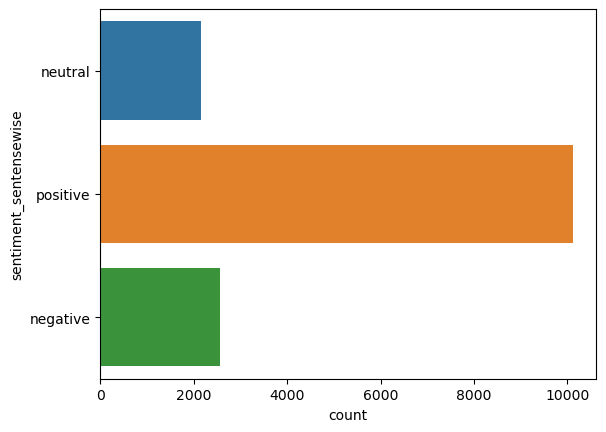

In [28]:
sns.countplot(y='sentiment', data=df)

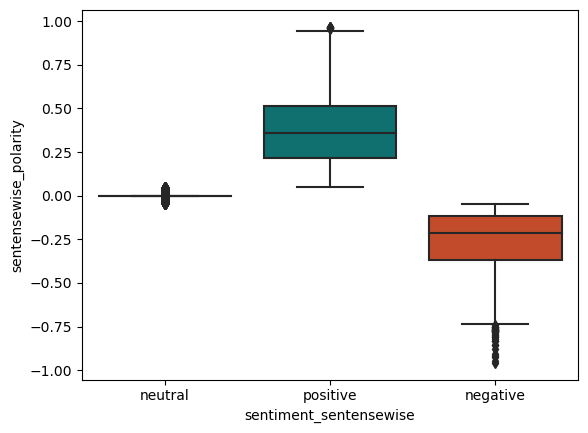

In [29]:
sns.boxplot(y='agg_polarity', 
            x='sentiment',
            palette=['#b2d8d8',"#008080", '#db3d13'], 
            data=df);

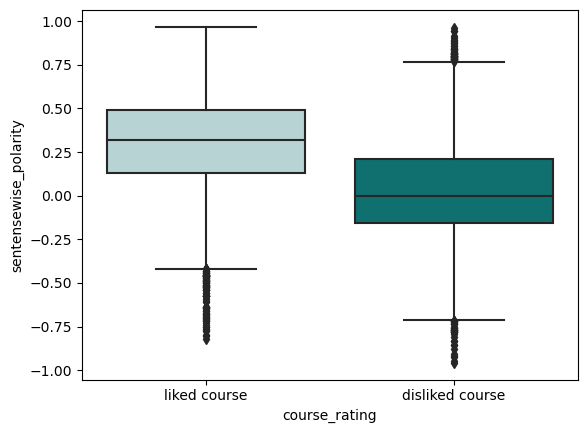

In [30]:
sns.boxplot(y='agg_polarity', 
            x='course_rating',
            palette=['#b2d8d8',"#008080", '#db3d13'], 
            data=df);

### rough calculation

In [31]:
df['polarity'] = df['reviews'].apply(lambda x: analyzer.polarity_scores(x))


In [32]:
df = pd.concat(
    [df.drop(['polarity'], axis=1), 
     df['polarity'].apply(pd.Series)], axis=1)
df.head(3)

,course_code,course_title,num_ratings,useful,easy,liked,num_reviews,reviews,course_rating,course_rating_int,reviews_lower,text_token,text_string,tokenized_reviews,sentensewise_polarity,sentiment_sentensewise,neg,neu,pos,compound
0,CS 115,Introduction to Computer Science 1,2111,21%,10%,23%,86,go to office hours and practice,liked course,1.0,go to office hours and practice,"[go, office, hours, practice]",go office hours practice,[go to office hours and practice],0.000000,neutral,0.000,1.000,0.000,0.0000
1,CS 115,Introduction to Computer Science 1,2111,21%,10%,23%,86,One of my least favourite courses. Although th...,disliked course,0.0,one of my least favourite courses. although th...,"[one, least, favourite, courses, although, thi...",one least favourite courses although things ni...,"[One of my least favourite courses., Although ...",0.282533,positive,0.065,0.672,0.264,0.8070
2,CS 115,Introduction to Computer Science 1,2111,21%,10%,23%,86,It starts with a very low pace but after midte...,disliked course,0.0,it starts with a very low pace but after midte...,"[starts, low, pace, midterm, gets, really, fas...",starts low pace midterm gets really fast canno...,[It starts with a very low pace but after midt...,0.383725,positive,0.110,0.636,0.253,0.9464


In [33]:
# Create new variable with sentiment "neutral," "positive" and "negative"
df['sentiment'] = df['compound'].apply(lambda x: 'positive' if x >0 else 'neutral' if x==0 else 'negative')
df.head(4)

,course_code,course_title,num_ratings,useful,easy,liked,num_reviews,reviews,course_rating,course_rating_int,...,text_token,text_string,tokenized_reviews,sentensewise_polarity,sentiment_sentensewise,neg,neu,pos,compound,sentiment
0,CS 115,Introduction to Computer Science 1,2111,21%,10%,23%,86,go to office hours and practice,liked course,1.0,...,"[go, office, hours, practice]",go office hours practice,[go to office hours and practice],0.000000,neutral,0.000,1.000,0.000,0.0000,neutral
1,CS 115,Introduction to Computer Science 1,2111,21%,10%,23%,86,One of my least favourite courses. Although th...,disliked course,0.0,...,"[one, least, favourite, courses, although, thi...",one least favourite courses although things ni...,"[One of my least favourite courses., Although ...",0.282533,positive,0.065,0.672,0.264,0.8070,positive
2,CS 115,Introduction to Computer Science 1,2111,21%,10%,23%,86,It starts with a very low pace but after midte...,disliked course,0.0,...,"[starts, low, pace, midterm, gets, really, fas...",starts low pace midterm gets really fast canno...,[It starts with a very low pace but after midt...,0.383725,positive,0.110,0.636,0.253,0.9464,positive
3,CS 115,Introduction to Computer Science 1,2111,21%,10%,23%,86,Took this in 2018 with no programming experien...,liked course,1.0,...,"[took, 2018, programming, experience, ever, st...",took 2018 programming experience ever started ...,[Took this in 2018 with no programming experie...,-0.107325,negative,0.148,0.733,0.119,-0.3712,negative


In [34]:
df["compound"].describe()

count    14829.000000
mean         0.372007
std          0.509436
min         -0.993300
25%          0.000000
50%          0.493900
75%          0.802500
max          0.997700
Name: compound, dtype: float64

<AxesSubplot:xlabel='count', ylabel='sentiment'>

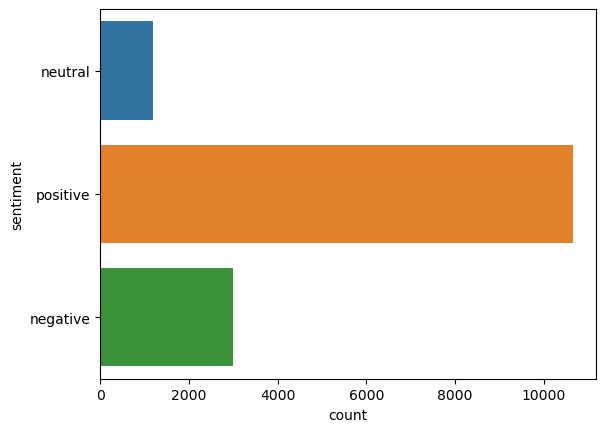

In [35]:
sns.countplot(y='sentiment', data=df)

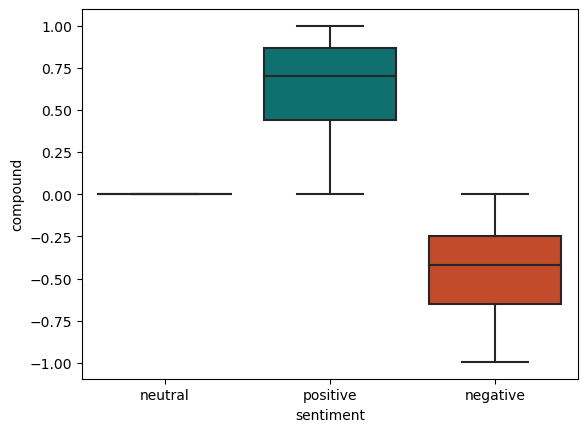

In [36]:
sns.boxplot(y='compound', 
            x='sentiment',
            palette=['#b2d8d8',"#008080", '#db3d13'], 
            data=df);

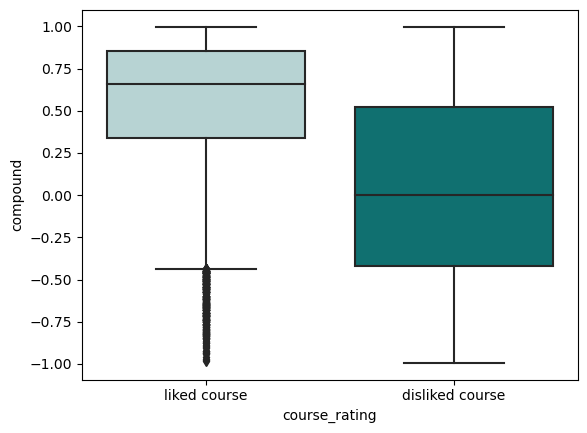

In [37]:
sns.boxplot(y='compound', 
            x='course_rating',
            palette=['#b2d8d8',"#008080", '#db3d13'], 
            data=df);